## Face recognition from scratch using Opencv 

In [188]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [189]:
image = cv2.imread('vegita.jpg')

In [190]:
print(image.shape)

(1080, 1920, 3)


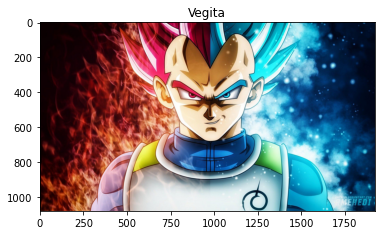

In [191]:
#why do we even have to use 'cv2.COLOR_BGR2RGB' here?
#this is becuase of a bug in jupyter notebook that actually reads an image in BGR(Blue, Green, Red)
#rather than in RGB(Red, Green, Blue), which is standard

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Vegita")
plt.show()

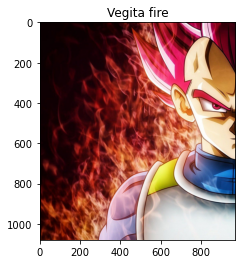

In [218]:
#left crop of vegita

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image[:, :970])
plt.title("Vegita fire")
plt.show()

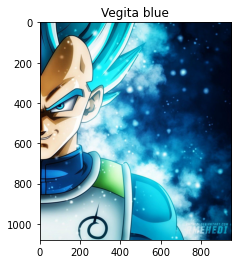

In [21]:
#right crop of vegita

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image[:, 970:])
plt.title("Vegita ice")
plt.show()

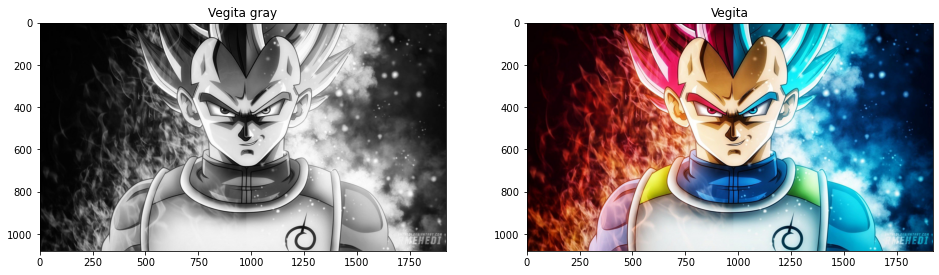

In [219]:
#gray scaling an image and comparing with actual image

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title("Vegita gray")

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title("Vegita")

plt.show()

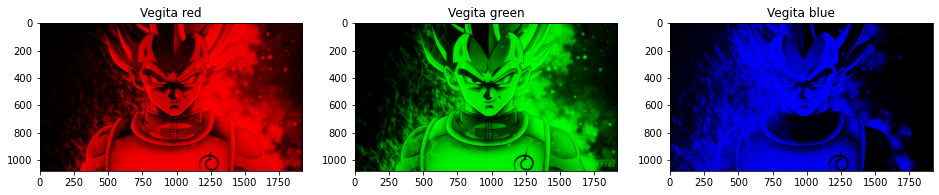

In [220]:
#filtering/separating/spliting the r,g,b channels of an image

zeros = np.zeros((image.shape[0], image.shape[1]), np.uint8)
b, g, r = cv2.split(image)

red = cv2.merge([r, zeros, zeros])
green = cv2.merge([zeros, g, zeros])
blue = cv2.merge([zeros, zeros, b])

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.imshow(red)
plt.title("Vegita red")

plt.subplot(1, 3, 2)
plt.imshow(green)
plt.title("Vegita green")

plt.subplot(1, 3, 3)
plt.imshow(blue)
cv2.imwrite("123.jpg", red)
plt.title("Vegita blue")

#cv2.imwrite is used to save the new image as "Greenimage.jpg" in the current directory 
cv2.imwrite("Greenimage.jpg", green)

plt.show()

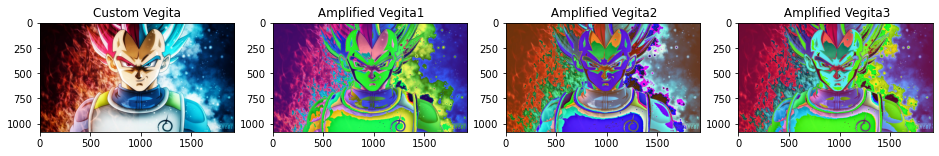

In [222]:
#merge the r,g,b channels to make a new custom image, which is copy of the original image
#amplifiy(changing the r,g,b values) the image to observe change in the image
custom_image = cv2.merge([r, g, b])
amplified_custom_image1 = cv2.merge([r+100,g+10,b+50])
amplified_custom_image2 = cv2.merge([r+10,g+50,b+100])
amplified_custom_image3 = cv2.merge([r+50,g+10,b+100])

plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB))
plt.title("Custom Vegita")

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(amplified_custom_image1, cv2.COLOR_BGR2RGB))
plt.title(" Amplified Vegita1")

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(amplified_custom_image2, cv2.COLOR_BGR2RGB))
plt.title(" Amplified Vegita2")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(amplified_custom_image3, cv2.COLOR_BGR2RGB))
plt.title(" Amplified Vegita3")

plt.show()

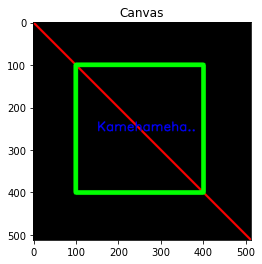

In [223]:
#creating our own canvas and doing some casual drawing

canvas = np.zeros((512,512, 3), np.uint8)
cv2.line(canvas, (0, 0), (511, 511), (255, 0, 0), 3)
cv2.rectangle(canvas, (100, 100), (400, 400), (0, 255, 0), 10)
cv2.putText(canvas, "Kamehameha..", 
    (150, 255),
    cv2.FONT_HERSHEY_SIMPLEX,
    1, 
    (0, 0, 255), 2)

plt.imshow(canvas)
plt.title("Canvas")
plt.show()

## Here comes the fun part(vidoes part), time for some action

In [224]:
#creating videoCapture object and rendering cars3 movie final race clip

capture = cv2.VideoCapture('Cars3.mp4')

while True:
    flag, frame = capture.read()
    if not flag:
        print('Could not access the video')
        break
    cv2.imshow('Final battle', frame)
    # use waitkey(25) for normal speedplay
    k = cv2.waitKey(1)
    if k == ord('q'):
        break


capture.release()
cv2.destroyAllWindows()

In [225]:
#rendering cars3 movie final race clip into two frames, actual color fram and gray frame

capture = cv2.VideoCapture('Cars3.mp4')
# cap = cv2.VideoCapture(0)

while capture.isOpened():
    sucess, frame = capture.read()
    #print(sucess)
    if sucess:
        #print("Mahola! We got the video.")
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Gray Frame', gray_frame)
        cv2.imshow('Color Frame', frame)

        k = cv2.waitKey(1)
        #if k & 0xff == ord('q'):
        if k == ord('q'):
            break
    else:
        print("Good bye!")
        break

capture.release()
cv2.destroyAllWindows()

In [226]:
#creating videoCapture object as capture and accessing web-cam

capture = cv2.VideoCapture(0)

while True:
    flag, frame = capture.read()
    if not flag:
        print('Could not access the camera')
        break
    cv2.imshow('My cam', frame)
    k = cv2.waitKey(1)
    if k == ord('q'):
        break


capture.release()
cv2.destroyAllWindows()

In [227]:
#accessing web-cam in two frames, normal frame and gray frame

capture = cv2.VideoCapture(0)

while capture.isOpened(): #capture.isOpended is nothing but True
    sucess, frame = capture.read()
    #print(sucess)
    if sucess:
        #print("Mahola! We got the video.")
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Gray Frame', gray_frame)
        cv2.imshow('Color Frame', frame)

        k = cv2.waitKey(25)
        #if k & 0xff == ord('q'):
        if k == ord('q'):
            break
    else:
        print("Good bye!")
        break

capture.release()
cv2.destroyAllWindows()

In [228]:
#blending image into video frame

capture = cv2.VideoCapture(0)
image = cv2.imread('vegita.jpg')

while True:
    flag, frame = capture.read()
    if not flag:
        print('Could not access the webcam')
        break
    image = cv2.resize(image, (frame.shape[1], frame.shape[0]))
    blended_frame = cv2.addWeighted(frame, 0.7, image, 0.3, gamma=0.1)
    cv2.imshow('Blendedd Frame', blended_frame)
    if cv2.waitKey(10) & 0xff == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()